# 1 заданне

### Паўсюль зробленае дадатковае заданне 5

###  Var. 16, m = -1, s^2= 4

In [1]:
import numpy as np
from numpy import random, vectorize
from scipy.stats import norm, f, chi2
from scipy.special import gammainc, gamma, betainc, beta
from matplotlib import pyplot as plt
import time

In [2]:
n = 10 ** 4
m = -1
s = 4 ** 0.5

In [3]:
class Gauss:
    def __init__(self, m, s, n, N=192):
        self.N = N
        self.m = m
        self.s = s
        self.n = n
    
    @staticmethod
    def __get_next_standard__(N):
        return (np.sum(random.random((N,))) - N/2) * ((12 / N) ** 0.5)
    
    @staticmethod
    def __get_next__(N, m, s):
        return m + s * Gauss.__get_next_standard__(N)
    
    def __iter__(self):
        for _ in range(self.n):
            yield Gauss.__get_next__(self.N, self.m, self.s)

In [4]:
it1 = (_ for _ in Gauss(m, s, n))
gauss = np.fromiter(it1, np.float)

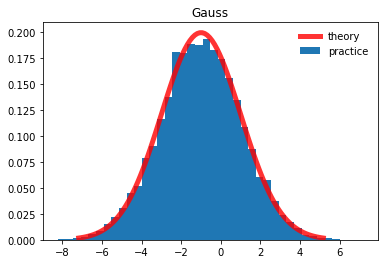

In [5]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.001, m, s), norm.ppf(0.999, m, s), 100)
ax.plot(x, norm.pdf(x, m, s), 'r-', lw=5, alpha=0.8, label='theory')
ax.hist(gauss, bins=40, density=True, label='practice')
ax.legend(loc='best', frameon=False)
plt.title('Gauss')
plt.show()

In [6]:
print(f'Theoretical: E={m} D={s ** 2}')
print(f'Practical: E={np.mean(gauss)} D={np.var(gauss)}')

Theoretical: E=-1 D=4.0
Practical: E=-1.0143586126844224 D=4.119655654618631


# 2 заданне

χ2-распределение с m степенями свободы, m = 4; Фишера с l и m степенями свободы (Fm,l) l = 5, m = 3

In [7]:
m1 = 4

In [8]:
def ChiSquare(m, n, N=192):
    for _ in range(n):
        yield np.sum(np.fromiter((x for x in Gauss(0, 1, m)), np.float) ** 2)

In [33]:
it2 = (_ for _ in ChiSquare(m1, n))
chi_square = np.fromiter(it2, np.float)

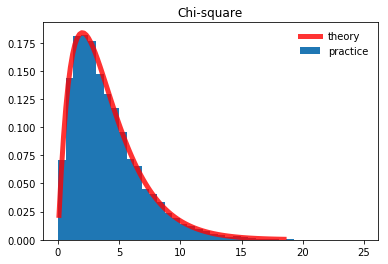

In [34]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(chi2.ppf(0.001, m1), chi2.ppf(0.999, m1), 100)
ax.plot(x, chi2.pdf(x, m1), 'r-', lw=5, alpha=0.8, label='theory')
ax.hist(chi_square, bins=40, density=True, label='practice')
ax.legend(loc='best', frameon=False)
plt.title('Chi-square')
plt.show()

In [35]:
print(f'Theoretical: E={m1} D={2*m1}')
print(f'Practical: E={np.mean(chi_square)} D={np.var(chi_square)}')

Theoretical: E=4 D=8
Practical: E=3.975310384403292 D=7.874910831572816


In [36]:
d1, d2 = 3, 5

In [37]:
def Fisher(d1, d2, n, N=192):
    for y1, y2 in zip(ChiSquare(d1, n, N), ChiSquare(d2, n, N)):
        yield (y1 / d1) / (y2 / d2)

In [53]:
it3 = (_ for _ in Fisher(d1, d2, n))
fisher = np.fromiter(it3, np.float)

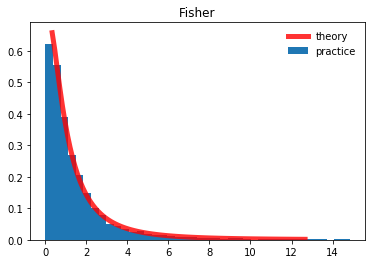

In [54]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(f.ppf(0.2, d1, d2), f.ppf(0.991, d1, d2), 100)
ax.plot(x, f.pdf(x, d1, d2), 'r-', lw=5, alpha=0.8, label='theory')
fisher.sort()
ax.hist(fisher[fisher<15], bins=40, density=True, label='practice')
ax.legend(loc='best', frameon=False)
plt.title('Fisher')
plt.show()

In [55]:
print(f'Theoretical: E={d2/(d2-2)} D={(2*(d1+d2-2)*d2**2)/(d1*(d2-4)*(d2-2)**2)}')
print(f'Practical: E={np.mean(fisher)} D={np.var(fisher)}')

Theoretical: E=1.6666666666666667 D=11.11111111111111
Practical: E=1.6513435539998431 D=11.225663134429222


# Дадатковае 3

In [17]:
def box_muller_stdn(n):
    i = 0
    while i < n:
        while True:
            x, y = random.uniform(-1, 1, 2)
            s = x ** 2 + y ** 2
            if 0 < s <= 1:
                break
        if i < n:
            yield x *( -2 * np.log(s) / s) ** 0.5
            i += 1
        if i < n:
            yield y *( -2 * np.log(s) / s) ** 0.5
            i += 1

In [18]:
it_4 = (x for x in box_muller_stdn(n))
box_muller = np.fromiter(it_4, np.float)

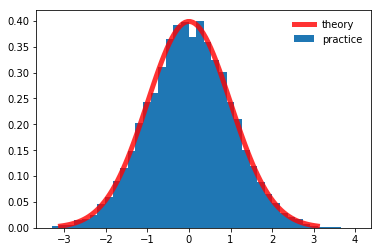

In [19]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.8, label='theory')
ax.hist(box_muller, bins=40, density=True, label='practice')
ax.legend(loc='best', frameon=False)
plt.show()

In [20]:
print(f'Theoretical: E={0} D={1}')
print(f'Practical: E={np.mean(box_muller)} D={np.var(box_muller)}')

Theoretical: E=0 D=1
Practical: E=0.008544226632284692 D=1.0016556183137955


# Дадатковае 4

In [21]:
odd = box_muller[::2]
even = box_muller[1::2]

In [22]:
print(f'correlation coef: {np.corrcoef(odd, even)[0,1]}')

correlation coef: -0.007022265212666159


# Дадатковае 5

In [23]:
@vectorize
def distr_gauss(x, m, s):
    return (1 + np.erf((x - m) / (2 ** 0.5 * s))) / 2

@vectorize
def distr_chisquare(x, k):
    return gammainc(k/2, x/2)

@vectorize
def distr_fisher(x, d1, d2):
    return betainc(d1 / 2, d2 / 2, d1 * x / (d1 * x + d2))

In [24]:
gauss_test = distr_gauss(gauss, m, s)
chisquare_test = distr_chisquare(chi_square, m1)
fisher_test = distr_fisher(fisher, d1, d2)

## 1. Крытэр Калмагорава

In [56]:
def kalmahorau(data, debug=False):
    d = 1.358
    sorted_data = np.sort(data)
    n = len(sorted_data)
    test_data = np.arange(1, n + 1) / n
    max_d = np.max(np.abs(test_data - sorted_data))
    value = n ** 0.5 * max_d
    if debug:
        print('kolmogorov : {}, delta : {}'.format(value, d))
    return value < d

In [57]:
kalmahorau(gauss_test, debug=True)

kolmogorov : 0.9199347428181015, delta : 1.358


True

In [58]:
kalmahorau(chisquare_test, debug=True)

kolmogorov : 1.2000588220378972, delta : 1.358


True

In [59]:
kalmahorau(fisher_test, debug=True)

kolmogorov : 0.735196985313824, delta : 1.358


True

# 2. Крытэр амега-квадрат

In [60]:
def omega_square(data, d, debug=False):
    data_sorted = np.sort(data)
    n = len(data)
    test_data = (np.arange(n) * 2 - 1) / 2 / n
    nw2 = 1 / 12 / n + np.sum((data_sorted - test_data) ** 2)
    
    print('omega-square : {}, delta : {}'.format(nw2, d))
    
    return nw2 < d

In [64]:
omega_square(gauss_test, 0.7435, debug=True)

omega-square : 0.1399925013994227, delta : 0.7435


True

In [65]:
omega_square(chisquare_test, 0.7435, debug=True)

omega-square : 0.5738225777538255, delta : 0.7435


True

In [66]:
omega_square(fisher_test, 0.7435, debug=True)

omega-square : 0.14072356524424617, delta : 0.7435


True